In [2]:
from os import name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

games = pd.read_csv("/content/drive/Shareddrives/302 Project/Data/GameSales.csv")
games = games.dropna(subset=["total_sales","title"]).reset_index()
games = games[games["total_sales"] > 5]
games = games.sort_values(["total_sales"]).reset_index()
size = games.groupby("title").size().reset_index()
games = games.reset_index(drop=True)
for i in range(size["title"].count()):
  if(size[0][i] == 1):
    games = games[games["title"] != size["title"][i]]
games = games.reset_index(drop=True)
games["speed"] = 0
for i in range(games["title"].count()):
    console = games["console"][i]
    if(console == "XOne"):
      games["console"][i] = "Xbox One (1310 GFLOPS)"
      games["speed"][i] = 1310
    if(console == "X360"):
      games["console"][i] = "Xbox 360 (240 GFLOPS)"
      games["speed"][i] = 240
    if(console == "PS3"):
      games["console"][i] = "Playstation 3 (230.4 GFLOPS)"
      games["speed"][i] = 230.4
    if(console == "PS4"):
      games["console"][i] = "Playstation 4 (1843 GFLOPS)"
      games["speed"][i] = 1843


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to b

Text(0.5, 1.0, 'Correlation Between Games Sales and Processing Power')

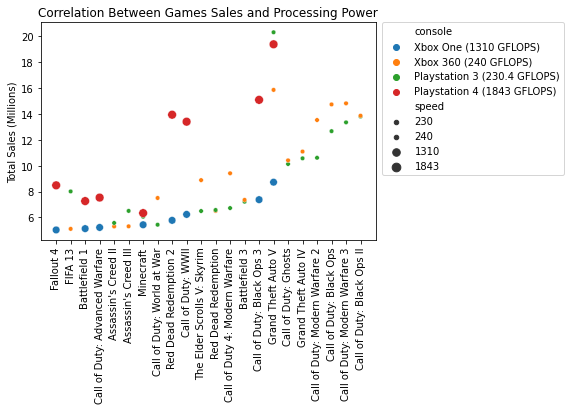

In [ ]:
ax = sns.scatterplot(data=games,x="title",y="total_sales",hue="console",size = "speed", sizes = (20,75))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
plt.ylabel("Total Sales (Millions)")
plt.title("Correlation Between Games Sales and Processing Power")

Text(0.5, 0.98, 'Correlation Between Game Sales and Processing Power')

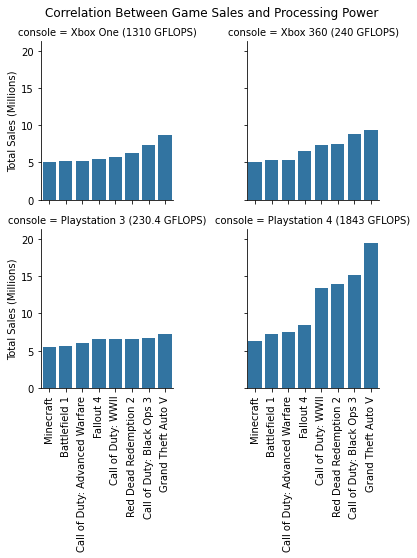

In [ ]:
g = sns.FacetGrid(games, col="console",col_wrap=2)
g.map_dataframe(sns.barplot, x="title", y="total_sales")
plt.xticks(rotation=90)
g.set_xticklabels(rotation=90)
g.set_xlabels("")
g.set_ylabels("Total Sales (Millions)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlation Between Game Sales and Processing Power')

Text(0, 0.5, '')

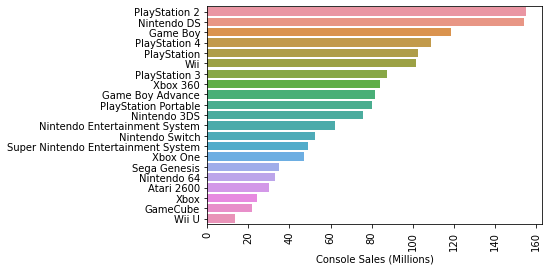

In [19]:
consoles = pd.read_csv("/content/drive/Shareddrives/302 Project/Data/consoles.csv")

consoles = consoles[consoles["ConsoleID"] != "PC"]
consoles = consoles[consoles["Sales"] > 11]
sns.barplot(data=consoles, x="Sales",y="Console_Name")
plt.xticks(rotation=90)
plt.xlabel("Console Sales (Millions)")
plt.ylabel("")